In [28]:
import yfinance as yf
import pandas as pd
import seaborn as sns
import mplfinance as mpf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, callbacks

[*********************100%%**********************]  1 of 1 completed
c:\Users\USER\anaconda3\Lib\site-packages\mplfinance\_arg_validators.py:84: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


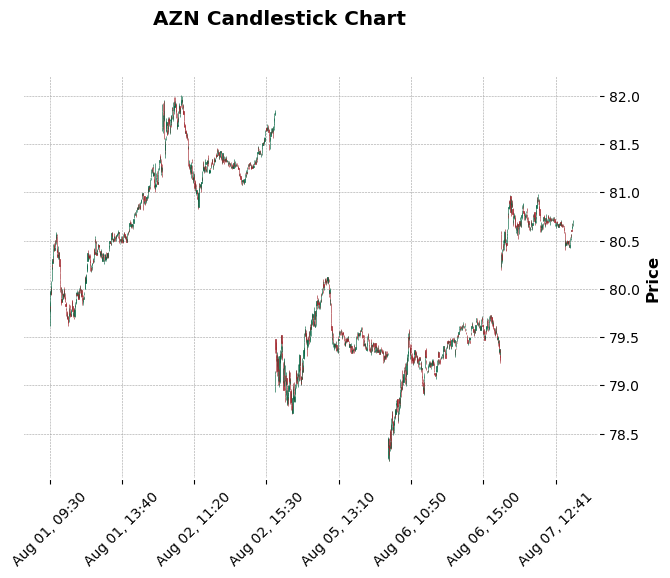

In [40]:

# Download recent data
recent_data = yf.download("AZN", period="5d", interval="1m")

# Drop unnecessary columns
recent_data = recent_data.drop(columns=["Adj Close"])

# Create a candlestick chart
mpf.plot(
    recent_data,
    type="candle",
    style="charles",
    title="AZN Candlestick Chart",
    ylabel="Price",
)

# Show the plot
mpf.show()

In [45]:

X = recent_data.drop(columns=["Close"])
y = recent_data.Close
train_X,val_X,train_y,val_y = train_test_split(X,y,random_state = 1)
input_shape = [4]


early_stopping = callbacks.EarlyStopping(
    min_delta=0.001, # minimium amount of change to count as an improvement
    patience=20, # how many epochs to wait before stopping
    restore_best_weights=True,
)


model = keras.Sequential([
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(1)
])
model.compile(
    optimizer='sgd',
    loss='mae',
    metrics=['mae'],
)
EPOCHS = 1000
history = model.fit(
    train_X, train_y,
    validation_data=(val_X, val_y),
    batch_size=64,
    epochs=EPOCHS,
    callbacks=[early_stopping],
    verbose=0,
)


c:\Users\USER\anaconda3\Lib\site-packages\keras\src\layers\normalization\batch_normalization.py:143: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [46]:
checl_data =  yf.download("AZN",period= "1d") 
checl_data = checl_data.drop(columns=["Adj Close"])
check_X = checl_data.drop(columns="Close")
#print(checl_data.head())
print(check_X)
print(model.predict(check_X))

[*********************100%%**********************]  1 of 1 completed

             Open       High        Low   Volume
Date                                            
2024-08-07  80.57  80.985001  80.199997  2627269
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
[[67.50921]]
